In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
def combinedplot(data, label, binwidth, figsize = (6, 6)):
    """
    Plot a combined `boxplot`, `histplot` and `rugplot` over the `data[label]`.

    Parameters
    ----------
    data : pd.DataFrame()
           data source to plot
    label : str
            designated label in `data` to plot
    binwidth : float, optional
               `binwidth` in `sns.histplot`
    figsize : tuple, default:(6, 6)
    """
    # initialize figure and axes
    fig, (ax_box, ax_hist) = plt.subplots(2, 1, figsize=figsize, sharex='col',
                                          gridspec_kw={"height_ratios": (.15, .85)})

    # boxplot
    sns.boxplot(data=data, x=label, ax=ax_box, color='crimson')

    # histplot
    sns.histplot(data=data, x=label, ax=ax_hist, binwidth=binwidth)

    # rugplot
    sns.rugplot(data=data, x=label, ax=ax_hist, height=0.05,
                color='gold',
                lw=2.)

    plt.tight_layout()

    return None

# Load Dataset

In [ ]:
data = pd.read_csv("Salary_dataset.csv")
data.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


# Clean Data

1.   Convert salaries to 1000 $
2.   Delete the first column which is not useful
3.   Rename columns to include the units.


In [ ]:
# Convert salaries to 1000 $
data['Salary'] = data['Salary']/1000.

In [ ]:
# Delete the first column which is not useful
data.drop(columns=['Unnamed: 0'], inplace=True)

In [ ]:
# Rename columns to include the units.
data.rename(columns={"YearsExperience": 'Experience (years)',
             'Salary': 'Salary (1000 $)'}, inplace=True)


In [ ]:
data.head()

,Experience (years),Salary (1000 $)
0,1.2,39.344
1,1.4,46.206
2,1.6,37.732
3,2.1,43.526
4,2.3,39.892


# Check Outliers

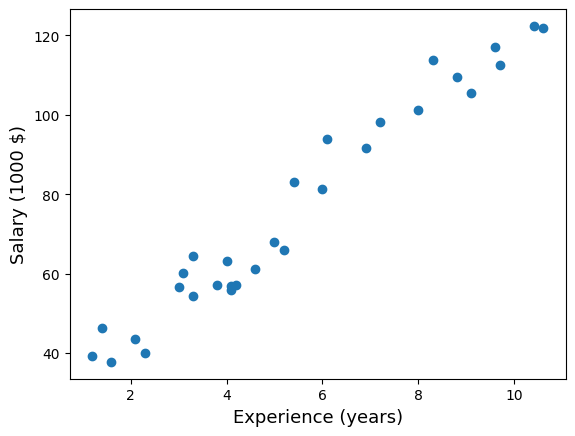

In [ ]:
fig, ax = plt.subplots()
ax.scatter(x = data['Experience (years)'], y = data['Salary (1000 $)'])
plt.ylabel('Salary (1000 $)', fontsize=13)
plt.xlabel('Experience (years)', fontsize=13)
plt.show()

Karena Tidak ada outliers, maka tidak perlu ada ada data yang di edit

# Missing Value Check

In [ ]:
data.isnull().sum()

Experience (years)    0
Salary (1000 $)       0
dtype: int64

# Univariate Analysis

In [ ]:
data.describe()

,Experience (years),Salary (1000 $)
count,30.000000,30.00000
mean,5.413333,76.00400
std,2.837888,27.41443
min,1.200000,37.73200
25%,3.300000,56.72175
50%,4.800000,65.23800
75%,7.800000,100.54575
max,10.600000,122.39200


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Experience (years)  30 non-null     float64
 1   Salary (1000 $)     30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


# Salary

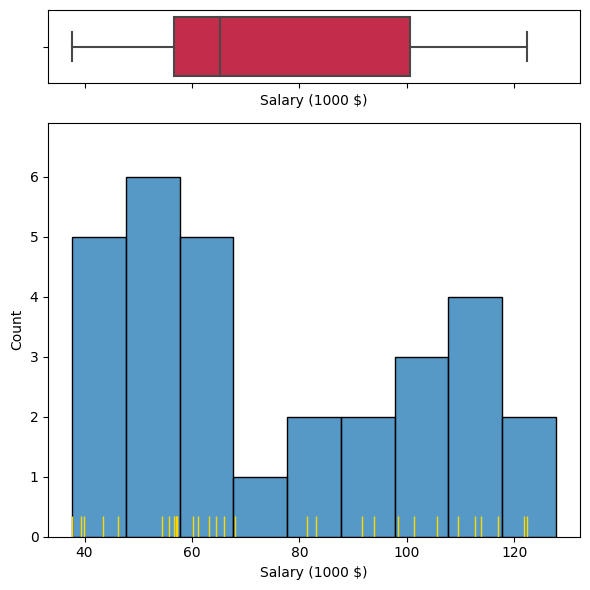

In [ ]:
combinedplot(data, 'Salary (1000 $)', binwidth=10.)

# Experienced Years

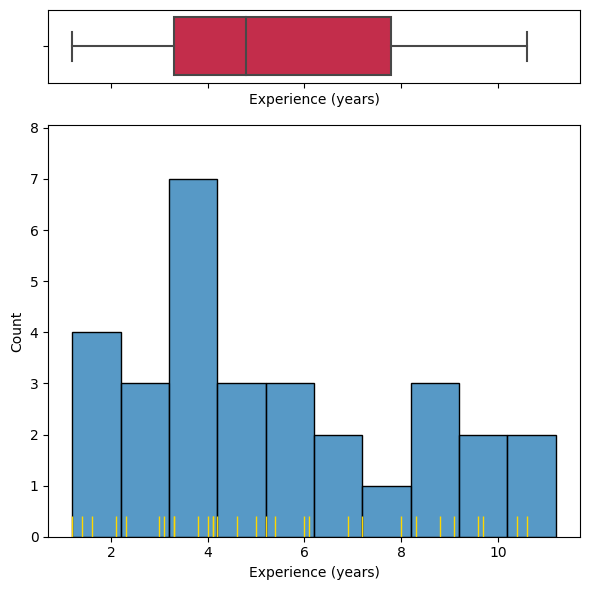

In [ ]:
combinedplot(data, 'Experience (years)', binwidth=1.)

# Outliers

In [ ]:
data.corr()

,Experience (years),Salary (1000 $)
Experience (years),1.000000,0.978242
Salary (1000 $),0.978242,1.000000


# Bivariate analysis

<Axes: xlabel='Experience (years)', ylabel='Salary (1000 $)'>

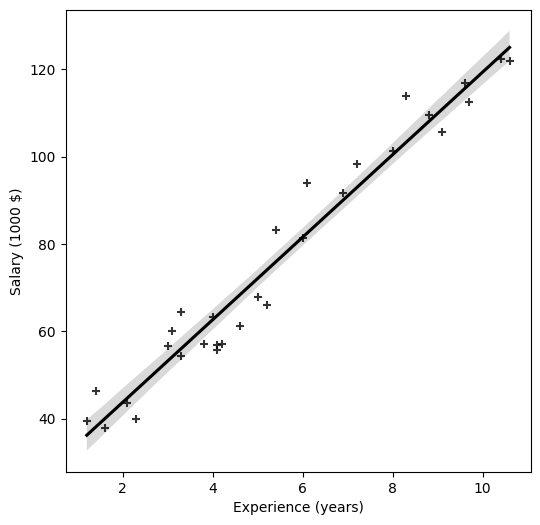

In [ ]:
fig = plt.figure(figsize=(6, 6))

sns.regplot(data=data,
            x='Experience (years)',
            y='Salary (1000 $)',
            color='k', marker='+')

# Model fitting

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
x = np.array(data['Salary (1000 $)']).reshape((-1, 1))
y = np.array(data['Experience (years)']).reshape((-1, 1))

model.fit(x, y)
print(f'Linear regression R2 value: {model.score(x, y):3.3f}')

Linear regression R2 value: 0.957


In [ ]:
# Contoh data baru yang ingin diprediksi
x_new = np.array([[43.526]])  # Ganti nilai 5000 dengan nilai yang diinginkan

# Lakukan prediksi
y_pred = model.predict(x_new)

# Cetak hasil prediksi
print(f'Prediksi pengalaman dengan gaji $5000: {y_pred[0][0]:.2f} tahun')

Prediksi pengalaman dengan gaji $5000: 2.12 tahun
